Homework 1

In [99]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
def random_subspace(k, dim):
    # Generate a random k x dim matrix
    random_matrix = np.random.randn(dim, dim)
    
    # Perform QR decomposition
    Q, _ = np.linalg.qr(random_matrix, mode='reduced')
    
    # Extract the first k columns of Q
    subspace_basis = Q[:, :k]
    
    return subspace_basis

In [101]:
def generate_points_in_subspace(subspace_basis, num_points):
    # Get the dimensionality of the subspace
    k = subspace_basis.shape[1]
    
    # Generate random coefficients for the basis vectors
    coefficients = np.random.randn(num_points, k)
    
    # Generate points in the subspace
    points_in_subspace = subspace_basis@coefficients.T
    
    return points_in_subspace

In [102]:
def mse(x, x_hat):
    return np.sum((x_hat - x) **2) / np.sum(x**2)

In [103]:
# Define the dimensionality of the ambient space
N = 1000
np.random.seed(10)
# Define the number of points
num_points = 500

k_list = list(range(100,1001,100))
k_list.insert(0,1)
sigma_list = [1,2,3,5,7,10]
mse_w_dif_sigma = {}

for sigma in sigma_list:
    mse_errors = []
    for k in k_list:
        # Generate a random subspace
        subspace_basis = random_subspace(k, N)
        # Generate random points in the subspace
        points_in_subspace = generate_points_in_subspace(subspace_basis, num_points)
        x = points_in_subspace # Shape Nx500
        projector = subspace_basis@subspace_basis.T
        z = np.random.randn(N,num_points) * sigma/np.sqrt(N)
        y = x + z
        x_hat = projector@y
        merror = mse(x, x_hat)
        mse_errors.append(merror)
    mse_w_dif_sigma[sigma] = mse_errors


Text(0.5, 0.98, 'MSE for different sigma values')

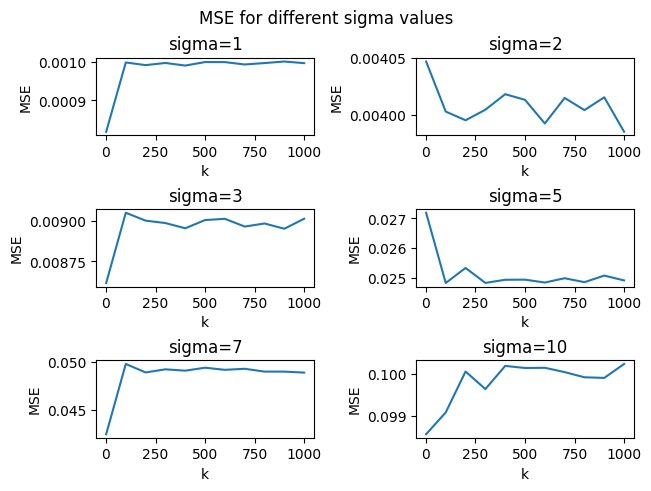

In [104]:
n_cols = 2
n_rows = len(mse_w_dif_sigma.keys()) / n_cols
n_rows = np.uint8(np.ceil(n_rows))
# n_rows = 2

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, layout="constrained")
i=0
for row in range(n_rows):
    for col in range(n_cols):
        sigma = sigma_list[i]
        mse_errors = mse_w_dif_sigma[sigma]
        i += 1
        axs[row, col].plot(k_list, mse_errors)
        axs[row, col].set_xlabel('k')
        axs[row, col].set_ylabel('MSE')
        axs[row, col].set_title(f'sigma={sigma}')
fig.suptitle('MSE for different sigma values')